In [3]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt

# Harcore bosons: Exact Diagonalization

#### We consider the hardcore boson hamiltonian in 3D. We set N = 2 and therefore have the total eight sites.
#### Since we are dealing with the hardcore boson case, we only consider the hopping term and the chemical term
#### We can also map the creation operator to sigmap and annihilation operator to sigmam
#### For the basis order, we will use (0,0,0), (1,0,0), (0,1,0), (0,0,1), (1,1,0), (1,0,1), (0,1,1), (1,1,1)

<div>
<img src="Lattice.png" width="400"/>
</div>

### Function implementation for the simulation

In [4]:
####### Hopping and Number operator #######

# The input variable (i, j) represent the index for each site
# Implements the hopping part: sigma(a_dag(i) * a(j) + a_dag(j) * a_dag(i))
def hopping(i, j): 
    H = qeye(1)
    for k in range(8): 
        if k==i: H = tensor(H, sigmap())
        elif k==j: H = tensor(H, sigmam())
        else: H = tensor(H, qeye(2))
    
    H = H + H.dag() # Hermicity
    return H

# Implements the local number operator: a_dag(i) * a(i)
def local_number(i):
    H = qeye(1)
    for k in range(8):
        if k==i: 
            H = tensor(H, sigmap() * sigmam())
        else: H = tensor(H, qeye(2))
    return H
        
# Implements the total number operator: sigma(a_dag(i) * a(i))    
def total_number():
    H = local_number(0)
    for i in range(1, 8):
        H = H + local_number(i)
    return H
    
####### Total Hamiltonian #######
def hardcoreboson_lattice_hamiltonian(t, mu):
    # Hopping term
    Hhop = -t * (hopping(0, 1) + hopping(0, 2) + hopping(0, 3))
    Hhop = Hhop -t * (hopping(1, 0) + hopping(1, 4) + hopping(1, 5))
    Hhop = Hhop -t * (hopping(2, 0) + hopping(2, 4) + hopping(2, 6))
    Hhop = Hhop -t * (hopping(3, 0) + hopping(3, 5) + hopping(3, 6))
    Hhop = Hhop -t * (hopping(4, 1) + hopping(4, 2) + hopping(4, 7))
    Hhop = Hhop -t * (hopping(5, 1) + hopping(5, 3) + hopping(5, 7))
    Hhop = Hhop -t * (hopping(6, 2) + hopping(6, 3) + hopping(6, 7))
    Hhop = Hhop -t * (hopping(7, 4) + hopping(7, 5) + hopping(7, 6))
    
    # Chemical term
    H = Hhop
    H = H + (6 * t - mu) * total_number()
    
    return H

####### Partition function #######
# beta is defined by the 1 / (k * T) where k is the Boltzmann constant, T is the temperature
def partition(H, beta):
    Z = 0
    eigen_energy_spectrum = H.eigenenergies()
    
    for i in range(len(eigen_energy_spectrum)):
        Z = Z + np.exp(-beta * eigen_energy_spectrum[i])
    return Z

####### Average particle number and average energy #######
def average_particle_number(H, beta):
    Z = partition(H, beta)
    N = total_number()
    
    n_average = (N * (-beta * H).expm()).tr() / Z
    return n_average

def average_energy(H_mu0, H, beta):
    Z = partition(H, beta)
    
    e_average = (H_mu0 * (-beta * H).expm()).tr() / Z
    return e_average


### Real simulation: part (a)

In [5]:
####### Hamiltonian setting #######
t = 1
beta = 12
mu = 1.4

# Average particle number calculation
H = hardcoreboson_lattice_hamiltonian(t, mu)
n_average = average_particle_number(H, beta)
print('Average particle number:' + str(n_average))

# Average energy calculation
H_mu0 = hardcoreboson_lattice_hamiltonian(t, mu = 0)
e_average = average_energy(H_mu0, H, beta)
print('Average energy: ' + str(e_average))


Average particle number:1.449191665713672
Average energy: 0.6365022749532688


### Real simulation: part (b)

Text(0.5, 1.0, 'Hardcore boson periodic cubic lattice model')

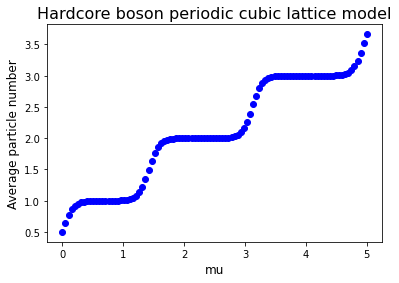

In [6]:
####### Hamiltonian setting #######
t = 1
beta = 12

N = 100
mu_min = 0
mu_max = 5
mu_array = np.linspace(mu_min, mu_max, N)

# Average particle number calculation
average_particle_number_array = []

for mu in mu_array:
    H = hardcoreboson_lattice_hamiltonian(t, mu)
    n_average = average_particle_number(H, beta)
    average_particle_number_array.append(n_average)

# Plot the result
plt.rcParams['figure.facecolor'] = 'white'
plt.plot(mu_array, average_particle_number_array, 'bo')
plt.xlabel('mu', fontsize = 12)
plt.ylabel('Average particle number', fontsize = 12)
plt.title('Hardcore boson periodic cubic lattice model', fontsize = 16)


